<a href="https://colab.research.google.com/github/Mweru/Bank-Marketing-Data-Analysis/blob/main/Bank_Marketing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Business Understanding
This data set contains records relevant to a direct marketing campaign of a Portuguese banking institution sourced from [Kaggle](https://www.kaggle.com/datasets/ruthgn/bank-marketing-data-set/data). The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

## Problem statement

Term deposits are cash investment held at a financial institution and are a major source of revenue for banks--making them important for financial institutions to market. Telemarketing remains to be a popular marketing technique because of the potential effectiveness of human-to-human contact provided by a telephone call, which is sometimes quite the opposite of many impersonal and robotic marketing messages relayed through social and digital media. However, executing such direct marketing effort usually requires a huge investment by the business as large call centers need to be contracted to contact clients directly.

## Objectives
Use this data set to test the performance of your classification models and to explore the best strategies to improve a banking institution's next direct marketing campaign.

Analyze this data set and identify the patterns that will help us develop future strategies & To answer the question; How can the banking institution have more effective direct marketing campaigns in the future?



# Data Understanding
Specific details about the dataset can be found in the [Data Report](https://docs.google.com/document/d/1X5978wftiwQ_1Ef9aMhId56umDE_R8Ha-ipip15CuPI/edit?usp=sharing) found in this Repository.

In [10]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [1]:
#loading and previewing the data
df = pd.read_csv('bank-direct-marketing-campaigns.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
#checking the number of rows and columns
df.shape

(41188, 20)

In [3]:
#checking for duplicates
df.duplicated().sum()

np.int64(1784)

In [4]:
#dropping the duplicates
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [5]:
#checking for missing values
df.isna().sum().sum()

np.int64(0)

In [6]:
#checking the value counts for columns in search for placeholders since there are no missing values
for column in df.columns:
  print(f"Value counts for column '{column}':")
  print(df[column].value_counts())
  print()

Value counts for column 'age':
age
31    1825
32    1764
33    1741
35    1671
36    1670
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64

Value counts for column 'job':
job
admin.           9873
blue-collar      8835
technician       6404
services         3801
management       2820
retired          1683
entrepreneur     1405
self-employed    1386
housemaid        1028
unemployed        992
student           852
unknown           325
Name: count, dtype: int64

Value counts for column 'marital':
marital
married     23869
single      10997
divorced     4459
unknown        79
Name: count, dtype: int64

Value counts for column 'education':
education
university.degree      11561
high.school             9121
basic.9y                5785
professional.course     5018
basic.4y                3993
basic.6y                2222
unknown                 1686
illiterate                18
Name: count, dtype: int64

Value counts for column 'defaul

There are no missing values, however there is a placeholder `unknown` that is used in several columns which we will maintain

## Explorative Data Analysis
View [my Dashboard here](https://powerbi.microsoft.com/)

In [7]:
#a pie chart showing the distribution of the rate of term deposit subscription
fig = px.pie(df, names='y', title='Distribution of Term Deposit Subscription')
fig.show()

Visual of the top campaigns that brought the highest number of subscription as well as those with the highest numbers of no subscription

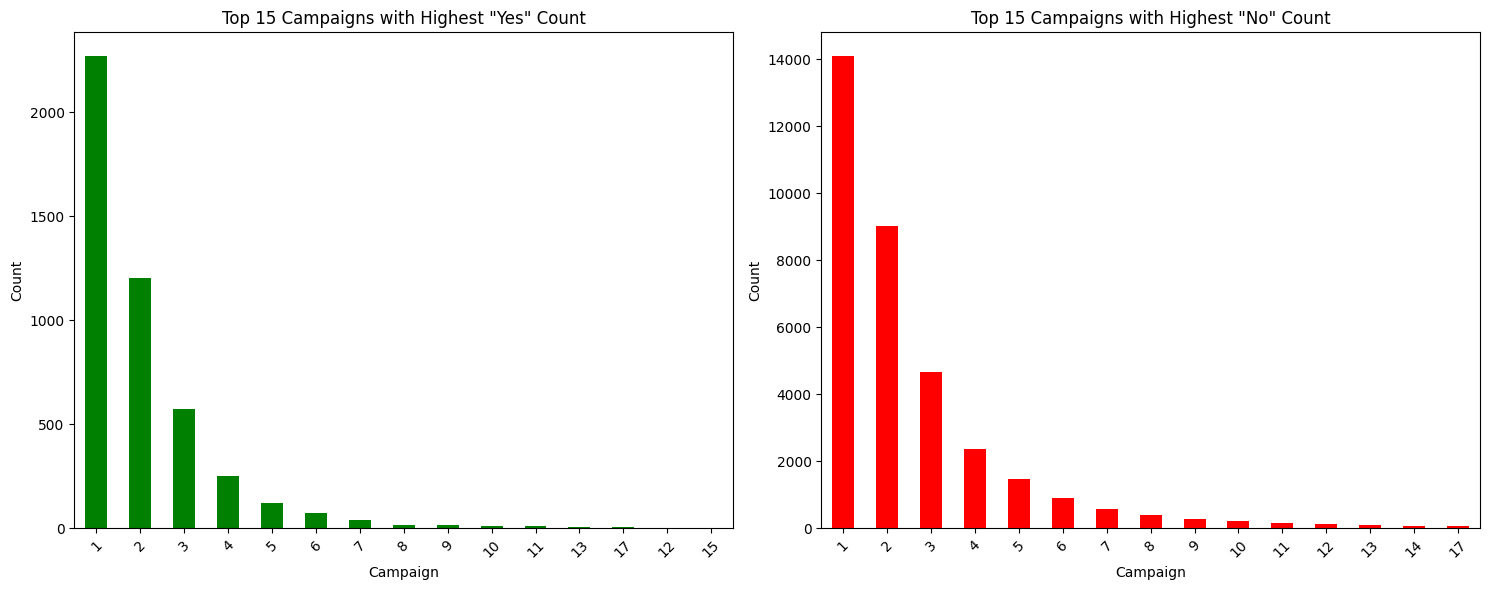

In [9]:
campaign_counts = df.groupby(['campaign', 'y']).size().unstack(fill_value=0)

top_yes = campaign_counts['yes'].nlargest(15)
top_no = campaign_counts['no'].nlargest(15)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

top_yes.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Top 15 Campaigns with Highest "Yes" Count')
axes[0].set_xlabel('Campaign')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(top_yes.index, rotation=45)

top_no.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Top 15 Campaigns with Highest "No" Count')
axes[1].set_xlabel('Campaign')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(top_no.index, rotation=45)

plt.tight_layout()
plt.show()